# LKDTree benchmark

In this notebook we will test the performance of our "labeled" LKDTree versus the non-labelled and scipy's KDTree version. Scipy will come out on top because it is highly optimized C code. The important comparison, however, is between the labelled and the naive version.

We will run two tests:

1. Using randomly distributed points. I suspect the labelled KDTree will not make a big dent here because there is no local structure to the data.
2. Using points from hemibrain neurons. 

In [2]:
import lkdtree

import numpy as np
import pandas as pd

from scipy.spatial import cKDTree
from time import time
from tqdm.auto import tqdm

In [4]:
# A single query point
QUERY = [100, 100, 200]


def test_random(n_objects, points_per_object=10_000):
    """Benchmark using random points."""
    # Create random points
    np.random.seed(1985)
    pnts = np.random.randint(0, 500, size=(n_objects * points_per_object, 3))
    
    # Split into approx N objects
    labels = np.random.randint(0, n_objects, size=len(pnts), dtype='uint16')
    
    return test_points(pnts, labels)

    
def test_points(pnts, labels):  
    """Run benchmark on provided points & labels."""
    bench = []
    
    bench.append(len(np.unique(labels)))
    bench.append(len(pnts))
    
    # Benchmark a single labelled KDTree 
    s = time()
    tree = lkdtree.LKDTree(pnts, labels)
    bench.append(time() - s)
    
    s = time()
    _ = tree.query(QUERY)
    bench.append(time() - s)    
    
    bench.append(tree._nodes_visited)
    
    # Benchmark multiple unlabelled KDTrees
    s = time()
    trees = [lkdtree.KDTree(pnts[labels == i]) for i in np.unique(labels)]
    bench.append(time() - s)
    
    s = time()
    _ = [t.query(QUERY) for t in trees]
    bench.append(time() - s) 
    
    bench.append(sum([t._nodes_visited for t in trees]))
    
    # Benchmark multiple scipy KDTrees
    s = time()
    trees = [cKDTree(pnts[labels == i]) for i in np.unique(labels)]
    bench.append(time() - s)
    
    s = time()
    _ = [t.query(QUERY) for t in trees]
    bench.append(time() - s)   
    
    return bench

In [10]:
random = []

for N in tqdm([1, 5, 10, 20, 30, 50, 100, 150, 200, 300, 500], desc='Testing'):
    for i in range(5):
        random.append(test_random(N))
  
random = pd.DataFrame(random, columns=['n_objects', 'n_points',
                                       'lkdtree_build', 'lkdtree_query', 'lkdtree_visited',
                                       'kdtree_build', 'kdtree_query', 'kdtree_visited',
                                       'ckdtree_build', 'ckdtree_query'])
random

Testing:   0%|          | 0/11 [00:00<?, ?it/s]

,n_objects,n_points,lkdtree_build,lkdtree_query,lkdtree_visited,kdtree_build,kdtree_query,kdtree_visited,ckdtree_build,ckdtree_query
0,1,10000,0.654263,0.000333,48,0.402939,0.000190,42,0.002853,0.000084
1,1,10000,0.605845,0.000325,48,0.398960,0.000166,42,0.002423,0.000074
2,1,10000,0.589332,0.000332,48,0.394509,0.000164,42,0.002468,0.000074
3,1,10000,0.634694,0.000327,48,0.391964,0.000163,42,0.002413,0.000068
4,1,10000,0.593837,0.000326,48,0.391885,0.000166,42,0.002411,0.000069
5,5,50000,3.005048,0.000775,105,1.965539,0.000666,193,0.015357,0.000213
6,5,50000,2.982783,0.000754,105,2.038930,0.000777,193,0.026224,0.000253
7,5,50000,3.067834,0.000751,105,1.976915,0.000679,193,0.013683,0.000222
8,5,50000,2.973329,0.000750,105,1.969117,0.000663,193,0.014947,0.000224
9,5,50000,2.975987,0.000814,105,1.978603,0.000662,193,0.015242,0.000243


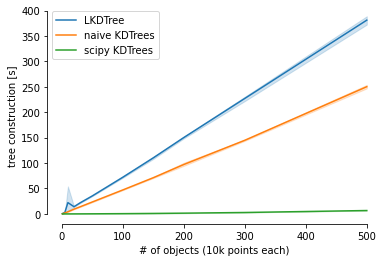

In [11]:
import seaborn as sns

ax = sns.lineplot(data=random, x='n_objects', y='lkdtree_build', label='LKDTree')
ax = sns.lineplot(data=random, x='n_objects', y='kdtree_build', label='naive KDTrees')
ax = sns.lineplot(data=random, x='n_objects', y='ckdtree_build', label='scipy KDTrees')

ax.set_xlabel('# of objects (10k points each)')
ax.set_ylabel('tree construction [s]')

sns.despine(trim=True)

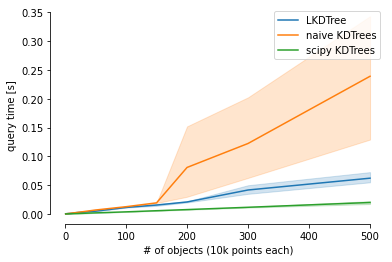

In [12]:
import seaborn as sns

ax = sns.lineplot(data=random, x='n_objects', y='lkdtree_query', label='LKDTree')
ax = sns.lineplot(data=random, x='n_objects', y='kdtree_query', label='naive KDTrees')
ax = sns.lineplot(data=random, x='n_objects', y='ckdtree_query', label='scipy KDTrees')

ax.set_xlabel('# of objects (10k points each)')
ax.set_ylabel('query time [s]')

sns.despine(trim=True)

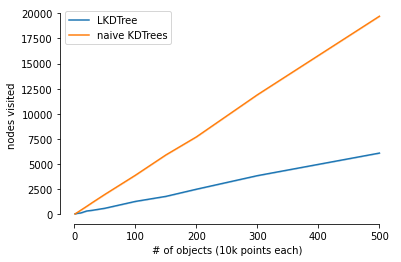

In [13]:
import seaborn as sns

ax = sns.lineplot(data=random, x='n_objects', y='lkdtree_visited', label='LKDTree')
ax = sns.lineplot(data=random, x='n_objects', y='kdtree_visited', label='naive KDTrees')

ax.set_xlabel('# of objects (10k points each)')
ax.set_ylabel('nodes visited')

sns.despine(trim=True)

Now let's try this with some real data. Below we're loading point clouds for neurons from the Janelia hemibrain dataset.

In [65]:
import pickle

with open('/Users/philipps/Downloads/hemibrain_dotprops_jrc2018f_5k.pkl', 'rb') as f:
    dp = pickle.load(f)

In [66]:
import fastremap

dp_points = []
for n in dp:
    dp_points.append(pd.DataFrame(n.points, columns=['x','y','z']))
    dp_points[-1].insert(0, 'id', n.id)

dp_points = pd.concat(dp_points, axis=0)
dp_points['label'] = fastremap.renumber(dp_points.id.values)[0] - 1
dp_points.head()

,id,x,y,z,label
0,730562993,158.974930,76.398560,125.875023,0
1,730562993,158.079193,76.562843,126.730667,0
2,730562993,157.541672,76.736404,127.933464,0
3,730562993,157.369736,76.630768,128.960510,0
4,730562993,157.381104,75.668358,130.047897,0


In [43]:
dp_points.label.value_counts().mean()

1138.6646

In [44]:
real = []

for N in tqdm([1, 5, 10, 20, 30, 50, 100, 200, 300, 500, 1000, 2000], desc='Testing'):
    pnts = dp_points[dp_points.label.isin(list(range(N)))]
    for i in range(1):
        real.append(test_points(pnts[['x','y','z']].values, pnts.label.values))
  
real = pd.DataFrame(real, columns=['n_objects', 'n_points',
                                   'lkdtree_build', 'lkdtree_query', 'lkdtree_visited',
                                   'kdtree_build', 'kdtree_query', 'kdtree_visited',
                                   'ckdtree_build', 'ckdtree_query'])
real.head()

Testing:   0%|          | 0/12 [00:00<?, ?it/s]

,n_objects,n_points,lkdtree_build,lkdtree_query,lkdtree_visited,kdtree_build,kdtree_query,kdtree_visited,ckdtree_build,ckdtree_query
0,1,1520,0.144471,0.007399,1236,0.083023,0.000329,78,0.000369,0.000072
1,5,11743,0.864183,0.026610,4365,0.606670,0.001379,355,0.002452,0.000213
2,10,13915,1.000245,0.052626,7959,0.711613,0.002239,600,0.003071,0.000355
3,20,26717,1.909264,0.099022,15848,1.370758,0.004804,1251,0.011354,0.001184
4,30,34963,2.592775,0.156457,24038,1.785464,0.007090,1838,0.010823,0.001076


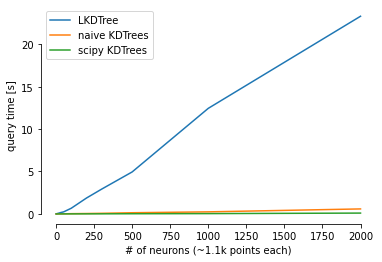

In [45]:
import seaborn as sns

ax = sns.lineplot(data=real, x='n_objects', y='lkdtree_query', label='LKDTree')
ax = sns.lineplot(data=real, x='n_objects', y='kdtree_query', label='naive KDTrees')
ax = sns.lineplot(data=real, x='n_objects', y='ckdtree_query', label='scipy KDTrees')

ax.set_xlabel('# of neurons (~1.1k points each)')
ax.set_ylabel('query time [s]')

sns.despine(trim=True)

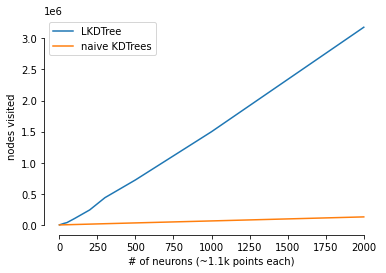

In [47]:
import seaborn as sns

ax = sns.lineplot(data=real, x='n_objects', y='lkdtree_visited', label='LKDTree')
ax = sns.lineplot(data=real, x='n_objects', y='kdtree_visited', label='naive KDTrees')

ax.set_xlabel('# of neurons (~1.1k points each)')
ax.set_ylabel('nodes visited')

sns.despine(trim=True)

In [59]:
from importlib import reload

reload(lkdtree.core)
reload(lkdtree)

<module 'lkdtree' from '/Users/philipps/Google Drive/Cloudbox/Github/nblast-knn/lkdtree/__init__.py'>

In [61]:
size = 50_000
pnts = np.random.randint(0, 500, size=(size * 2, 3))

tree1 = lkdtree.KDTree(pnts[:size])
tree2 = lkdtree.KDTree(pnts[size:])

In [67]:
tree1 = lkdtree.KDTree(dp_points.loc[dp_points.label == 0, ['x', 'y', 'z']].values)
tree2 = lkdtree.KDTree(dp_points.loc[dp_points.label == 1, ['x', 'y', 'z']].values)

In [68]:
%time tree1.query_tree(tree2)

CPU times: user 99.6 ms, sys: 4.17 ms, total: 104 ms
Wall time: 105 ms


(array([15404.15917969, 15567.72070312, 22242.05273438, 22339.4921875 ,
        22361.59960938, 22167.27929688, 11801.64550781,  8385.99902344,
         8162.80419922,  7942.89599609, 17105.734375  ,  8477.7109375 ,
         8538.25976562,  8597.98242188, 22231.3828125 , 22120.00976562,
        21985.35546875, 22117.95703125,  8640.3515625 , 21962.5625    ,
         8539.9375    ,  8691.36035156, 21637.83789062, 17037.40429688,
         8421.34863281, 12907.796875  ,  8479.00976562, 12752.73242188,
        12661.04296875, 13138.51074219, 13051.30859375, 22051.6328125 ,
        21307.88085938, 13448.98144531,  7497.25146484, 17712.47265625,
        17383.44335938, 17368.55859375, 17157.65429688,  1152.6217041 ,
         1154.70410156,  1148.90881348,  1136.66027832,  1118.57861328,
         1109.109375  ,  1103.73181152,  1098.02307129,  1087.65917969,
         1074.40991211,  1051.63232422,  1045.72631836,  1045.65625   ,
         1046.55395508,  1038.8392334 ,  1022.79205322,  1011.07

In [69]:
%time _ = [tree1.query(p) for p in tree2.points]

CPU times: user 99.5 ms, sys: 3.36 ms, total: 103 ms
Wall time: 102 ms


In [70]:
np.array([r[0] for r in _]), np.array([r[1] for r in _])

(array([15404.159  , 15567.721  , 22242.053  , 22339.492  , 22361.6    ,
        22167.28   , 11801.6455 ,  8385.999  ,  8162.804  ,  7942.896  ,
        17105.734  ,  8477.711  ,  8538.26   ,  8597.982  , 22231.383  ,
        22120.01   , 21985.355  , 22117.957  ,  8640.352  , 21962.562  ,
         8539.9375 ,  8691.36   , 21637.838  , 17037.404  ,  8421.349  ,
        12907.797  ,  8479.01   , 12752.732  , 12661.043  , 13138.511  ,
        13051.309  , 22051.633  , 21307.88   , 13448.981  ,  7497.2515 ,
        17712.473  , 17383.443  , 17368.559  , 17157.654  ,  1152.6217 ,
         1154.7041 ,  1148.9088 ,  1136.6603 ,  1118.5786 ,  1109.1094 ,
         1103.7318 ,  1098.0231 ,  1087.6592 ,  1074.4099 ,  1051.6323 ,
         1045.7263 ,  1045.6562 ,  1046.554  ,  1038.8392 ,  1022.79205,
         1011.0785 ,  1009.5075 ,  1014.31775,  1028.3796 ,  1041.4015 ,
         1058.5474 ,   881.27045,   896.63306,   912.1986 ,  1078.472  ,
         1099.8267 ,  1131.3218 ,  1160.3577 ,  118

In [30]:
%load_ext line_profiler

In [64]:
%lprun -f lkdtree.KDTree._search_up tree1.query_tree(tree2)

Timer unit: 1e-06 s

Total time: 10.9899 s
File: /Users/philipps/Google Drive/Cloudbox/Github/nblast-knn/lkdtree/core.py
Function: _search_up at line 178

Line #      Hits         Time  Per Hit   % Time  Line Contents
   178                                               def _search_up(self, other_node, search_root, dists, ind):
   179     99982      52146.0      0.5      0.5          if isinstance(other_node, LeafNode):
   180                                                       # Depth-first search for the closest leaf
   181     49999    2963777.0     59.3     27.0              leaf, dist = self._forward_search(search_root, other_node.co)
   182                                           
   183                                                       # Now move back and check previous branches to make sure that
   184                                                       # (A) we have the actual nearest-neighbour
   185                                                       # (B) collec

In [34]:
%lprun -f lkdtree.KDTree._query [tree1.query(p) for p in tree2.points]

Timer unit: 1e-06 s

Total time: 2.07125 s
File: /Users/philipps/Google Drive/Cloudbox/Github/nblast-knn/lkdtree/core.py
Function: _query at line 81

Line #      Hits         Time  Per Hit   % Time  Line Contents
    81                                               def _query(self, point):
    82                                                   # Make sure point is an array
    83     10000       7590.0      0.8      0.4          point = np.asarray(point)
    84                                           
    85                                                   # Keep track of how many nodes we had to search
    86                                                   # (mostly for benchmarking)
    87     10000       4541.0      0.5      0.2          self._nodes_visited = 0
    88                                           
    89                                                   # Depth-first search for the closest leaf
    90     10000     582693.0     58.3     28.1          leaf, dist =